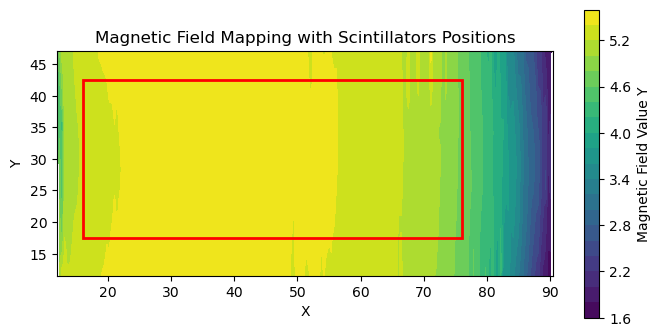

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import glob  # Per leggere più file automaticamente
npoints=200
# 1️⃣ Caricare e unire i file
file_list = ["../Data/CampoMagnetico/Centrale1.txt", "../Data/CampoMagnetico/Sinistra1.txt", "../Data/CampoMagnetico/Destra1.txt",
                "../Data/CampoMagnetico/Centrale2.txt", "../Data/CampoMagnetico/Sinistra1.txt", "../Data/CampoMagnetico/Destra2.txt",
                "../Data/CampoMagnetico/Centrale3.txt", "../Data/CampoMagnetico/Sinistra3.txt", "../Data/CampoMagnetico/Destra3.txt"]  # Sostituisci con i nomi dei tuoi file
data_list = [np.loadtxt(f, delimiter="\t") for f in file_list]  # Carica ogni file

# Unisce i dati in un unico array
data = np.vstack(data_list)  # Stack verticale per unire le righe

# 2️⃣ Estrarre colonne X, Y e campo Z
y, x, z = data[:, 2], (data[:, 1]-0.185)*(89.9-12.5)/(0.950-0.185)+12.5, data[:, 0]

# 3️⃣ Creare una griglia regolare
xi = np.linspace(min(x), max(x), npoints)  # 100 punti in X
yi = np.linspace(min(y), max(y), npoints)  # 100 punti in Y
X, Y = np.meshgrid(xi, yi)  # Griglia 2D

# 4️⃣ Interpolare i valori su tutta la griglia
Z = griddata((x, y), z, (X, Y), method='cubic')  # 'cubic' per interpolazione liscia


# Create the contour plot (without points)
plt.figure(figsize=(8, 4))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')  # Filled contour
plt.colorbar(contour, label="Magnetic Field Value Y")  

plt.gca().set_aspect("equal", adjustable="box")  # Maintain equal aspect ratio
plt.xlim(min(x), max(x))  # Limit X to data range
plt.ylim(min(y), max(y))  # Limit Y to data range

# ✅ Add a Rectangle to Mark the Object
object_y = 17.5  # X position (bottom-left corner)
object_x = 16.0  # Y position (bottom-left corner)
object_width = 60 # Width of the rectangle
object_height = 25.0  # Height of the rectangle


rectangle = plt.Rectangle(
    (object_x, object_y), object_width, object_height, 
    fill=False, edgecolor="red", linewidth=2  # Hollow with red border
)

plt.gca().add_patch(rectangle)  # Add the rectangle to the plot

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Magnetic Field Mapping with Scintillators Positions")


plt.show()


<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_3404/4257979035.py:19: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel("Time $ \dfrac{g_\mu}{2}$ (s)")
/tmp/ipykernel_3404/4257979035.py:39: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel("Time $ \dfrac{g_\mu}{2}$ (s)")


Pulsazione: 4615741.685847058  Decay Time:  1.588271365278077e-05
tau 1.588271365278077e-05   4.894204225685018e-07
B eff 5.423496480870292   0.0013643957311517477


Text(0.5, 0, 'Time $ \\dfrac{g_\\mu}{2}$ (s)')

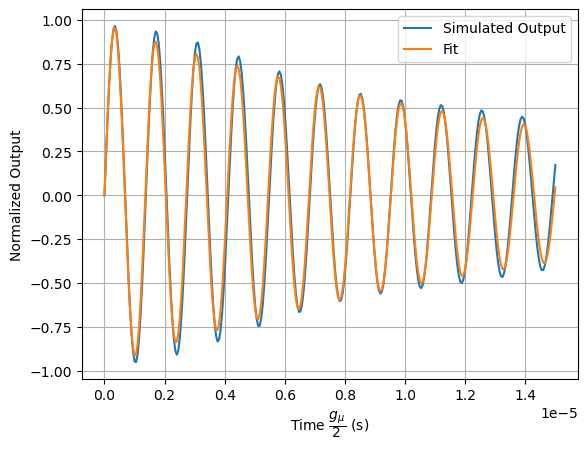

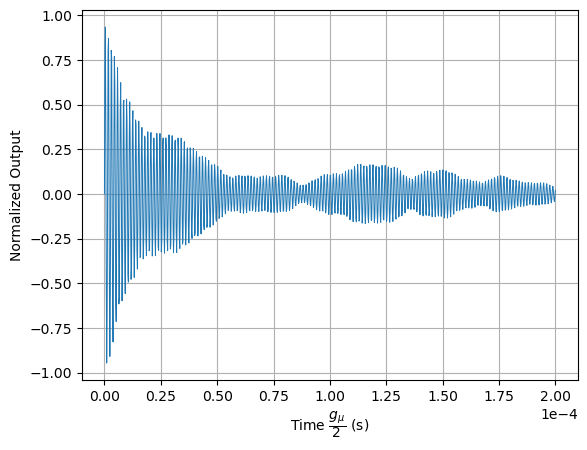

In [136]:
#Figure 1
from scipy.optimize import curve_fit
t=np.linspace(0,0.000015,300)
y=t*0
for i, j, k in zip(X.ravel(), Y.ravel(), Z.ravel()):
    if 16 < i < 76 and 17.5 < j < (17.5 + 25):
        w=(1.6*10**(-19)*10**(-3))/(1.88*10**(-28))*k
        y+=np.sin(w*t)


def f(x,a,b,c):
    return a*np.sin(b*x)*(np.e**(-x/c))
popt, pcov = curve_fit(f,t,y,p0=[200000000,851063*5,10**-5])

plt.plot(t,y/22000,label="Simulated Output")
plt.plot(t,f(t,*popt)/23000,label="Fit")
plt.grid()
plt.ylabel("Normalized Output")
plt.xlabel("Time $ \dfrac{g_\mu}{2}$ (s)")
plt.legend()
print("Pulsazione:",popt[1]," Decay Time: ",popt[2])
print("tau",popt[2]," ",np.sqrt(pcov[2][2]))
print("B eff",popt[1]/((1.6*10**(-19)*10**(-3))/(1.88*10**(-28)))," ", np.sqrt(pcov[1][1]) /((1.6*10**(-19)*10**(-3))/(1.88*10**(-28))))
#Figure2
t=np.linspace(0,200*10**-6,1000)
y=t*0
for i, j, k in zip(X.ravel(), Y.ravel(), Z.ravel()):
    if 16 < i < 76 and 17.5 < j < (17.5 + 25):
        w=(1.6*10**(-19)*10**(-3))/(1.88*10**(-28))*k
        y+=np.sin(w*t)


plt.figure(2)

plt.plot(t,y/22000,linewidth=0.7)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()
plt.ylabel("Normalized Output")
plt.xlabel("Time $ \dfrac{g_\mu}{2}$ (s)")
